### Introduction/Problem Statement

Terroir is the set of factors such as climate, soil, and management practices that influence the character of a wine. Climate determines the number of days in a year that present ideal growing conditions for grape vines. Average heat accumulation for a region can be calculated and compared to values from neighboring regions to provide an in depth picture of one of three factors of terroir (WSU, 2016).

The Sunnyslope wine grape growing district, located near the Snake River in southern Idaho, is one of the top producers of wine grapes in the state. The characteristic hot summers, cool winters, and low levels of precipitation pose a threat to grape quality in this region. In order for high quality grapes to be produced at the vineyards in the Snake River Valley's Sunnyslope district, the grapes must produce high concentrations of phenolic compounds which provide more depth and balanced flavors to the finished product, the wine. Studies show the bulk of grape development is conducted during the growin season from April 1st to October 31st, and that development is largely influenced by air temperature (WSU, 2016). Therefore, calculating the average heat accumulation can help predict the quality of the grapes produced in a vineyard of a specific region.

A Growing Degree Day, or GDD, is the term used for the daily average heat accumulation. For example, when the daily average temperature provides the proper conditions for grape maturation and development, that day is considered a GDD. The summation of GDDs from April 1st to October 31st provides a climatic snapshot of the region, and can be used to predict the growing conditions for the following years. The GDD equation is as follows: 
    
                                        GDD = ((max + min / 2) - 50) 

Hourly temperature datasets for two vineyards, Polo Cove and Hat Ranch, have been acquired through Dave Wilkin's Sunnyslope Project website (Wilkins, 2018). Polo Cove lies at a higher elevation than Hat Ranch, and I believe this difference will affect the number of GDD for the vineyards. Using Spyder and programming libraries, I will evaluate and analyze the data of three vineyards to create plots of average daily temperatures from April 1st to Octber 31st. Using daily values and the GDD formula, total GDD from each vineyard will be calculated and compared.

### Data and Methods 

Both datasets analyzed in this study were downloaded as '.csv' files from www.sunnyslope.boisestate.edu. The data was collected from a weather station located in the middle of the vine rows, and temperature data is collected every hour. In accordance with GDD calculations, data includes readings from April 1, 2017 to October 31, 2017. Initial steps included identifying the datasets, and successfully importning them into a Jupyter notebook along with any computing libraries need. Libraries included pandas and numbpy (see below). In order to verify the imported datasets had been added accurately, plots were generated in Python and compared to existing plots on the sunnyslope site. 

Dataset 1: Polo Cove 'PC_GDD.csv" 
Dataset 2: Hat Ranch 'HR_GDD.csv" 



In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

filename_PC = "PC_GDD.csv"

df = pd.read_csv(filename_PC)

The datasets were imported successfully, though the date values remained in a format that was unreadable by python. Converting traditional date format into datetime brought me more success. A new column was added to the dataframe, so calculations could proceed, and plots could be generated based on the datetime values. 

In [12]:
datearr_dt = pd.to_datetime(df['Date'])
datearr_dt[0]

df['Date_dt'] = datearr_dt

df[0:10]

,Date,Value,NP_Datetime,Date_dt
0,4/1/17 1:00,44.24,2017-04-01 01:00:00,2017-04-01 01:00:00
1,4/1/17 2:00,44.78,2017-04-01 02:00:00,2017-04-01 02:00:00
2,4/1/17 3:00,44.42,2017-04-01 03:00:00,2017-04-01 03:00:00
3,4/1/17 4:00,44.06,2017-04-01 04:00:00,2017-04-01 04:00:00
4,4/1/17 5:00,41.72,2017-04-01 05:00:00,2017-04-01 05:00:00
5,4/1/17 6:00,40.64,2017-04-01 06:00:00,2017-04-01 06:00:00
6,4/1/17 7:00,40.82,2017-04-01 07:00:00,2017-04-01 07:00:00
7,4/1/17 8:00,39.56,2017-04-01 08:00:00,2017-04-01 08:00:00
8,4/1/17 9:00,42.26,2017-04-01 09:00:00,2017-04-01 09:00:00
9,4/1/17 10:00,48.20,2017-04-01 10:00:00,2017-04-01 10:00:00


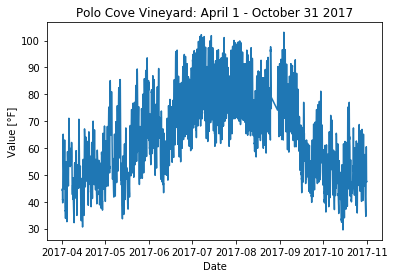

In [10]:
plt.plot(df['NP_Datetime'].values,df['Value'].values)
plt.title('Polo Cove Vineyard: April 1 - October 31 2017')
plt.xlabel('Date')
plt.ylabel('Value [°F]')

plt.show()

The same code was used to generate a plot for the Hat Ranch dataset (see 'GEOS_505_Project_Plots.ipynb'). 

Hourly temperature readings were recorded, and are associated wit the same day. The datetime values for a single day must be normalized. This allows for only one '2017-04-01' to exist in a single row. Next, groups of dates and associated temperatures were generated.

In [14]:
pd.DatetimeIndex(df['Date_dt']).normalize()

DatetimeIndex(['2017-04-01', '2017-04-01', '2017-04-01', '2017-04-01',
               '2017-04-01', '2017-04-01', '2017-04-01', '2017-04-01',
               '2017-04-01', '2017-04-01',
               ...
               '2017-10-31', '2017-10-31', '2017-10-31', '2017-10-31',
               '2017-10-31', '2017-10-31', '2017-10-31', '2017-10-31',
               '2017-10-31', '2017-10-31'],
              dtype='datetime64[ns]', name='Date_dt', length=5054, freq=None)

In [15]:
g = df.groupby(pd.DatetimeIndex(df['Date_dt']).normalize())

With 24 hours of temperature readings associated with and grouped under a single day, analysis of temperature values is possible. In order to calculate GDD, maximum and minimum temperatures must be computed. A new, empty dataframe is created and filled with existing and computed data.

In [21]:
dates = pd.DatetimeIndex(df['Date_dt']).normalize().unique()

avgT = np.zeros((dates.size,1))
maxT = np.zeros((dates.size,1))
minT = np.zeros((dates.size,1))

count = 0

for date in dates:
    avgT[count] = g['Value'].get_group(date.normalize()).mean()
    maxT[count] = g['Value'].get_group(date.normalize()).max()
    minT[count] = g['Value'].get_group(date.normalize()).min()
    
    count = count + 1 

In [17]:
data = [np.asarray(dates),avgT,maxT,minT]

In [22]:
df_2 = pd.DataFrame()
df_2['Date'] = dates
df_2['AvgT'] = avgT
df_2['MaxT'] = maxT 
df_2['MinT'] = minT

In [23]:
DD = ((maxT + minT)/2) - 50
DD[DD<0.0] = 0.0

#GDD can only be positive numbers 

### Results 

The data provided by Dave Wilkins and his Sunnyslope website was reworked and analyzed to calculate the growing degree days of two vineyards in the Sunnyslope district, Polo Cove and Hat Ranch. The final dataset provides a clean look at the daily average, maximum, minimum temperatures and the number of GDD. 

In [24]:
DD.sum()

3342.33

The total GDD of Polo Cove Vineyard is 3342.33, while Hat Ranch has a calculated 3103.2 GDD. Hat Ranch lies at an elevation closer to the Snake River which allows for cooling winds and a greater diurnal shift to keep the temperatures cooler than Polo Cove. 

### Next Steps 
I hope to use this code to calculate the GDD of each Sunnyslope vineyard for a more in depth investigation into climatic conditions in the district. This project has been a great learning opportunity for me, and I hope to take this code and teach others about the importance of GDD. 